$\newcommand{\Sum}{\sum\limits}$
$\newcommand{\Int}{\int\limits}$
$\newcommand{\Intf}{\int\limits_{-\infty}^{+\infty}}$
$\newcommand{\Prod}{\prod\limits}$
$\newcommand{\Max}{\max\limits}$
$\newcommand{\Min}{\min\limits}$
$\newcommand{\Lim}{\lim\limits}$
$\newcommand{\Var}{\mathbb{V}}$
$\newcommand{\Exp}{\mathbb{E}}$
$\newcommand{\argmax}{\arg\max}$
$\newcommand{\Cov}{\mathrm{Cov}}$
$\newcommand{\makebold}[1]{\boldsymbol{#1}}$
$\newcommand{\mean}[1]{\overline{#1}}$
$\newcommand{\Prob}{\mathcal{P}}$
$\newcommand{\lp}{\left}$
$\newcommand{\rp}{\right}$

$\newcommand{\RR}{\mathbb{R}}$

$\newcommand{\boldtheta}{\boldsymbol{\theta}}$
$\newcommand{\boldtau}{\boldsymbol{\tau}}$

$\newcommand{\boldx}{\boldsymbol{x}}$
$\newcommand{\boldu}{\boldsymbol{u}}$
$\newcommand{\boldv}{\boldsymbol{v}}$

$\newcommand{\boldX}{\boldsymbol{X}}$
$\newcommand{\boldY}{\boldsymbol{Y}}$
$\newcommand{\boldZ}{\boldsymbol{Z}}$

$\newcommand{\Poisson}{\mathrm{Poisson}}$
$\newcommand{\Uniform}{\mathrm{Uniform}}$
$\newcommand{\Binomial}{\mathrm{Binomial}}$
$\newcommand{\Gammap}{\mathrm{Gamma}}$
$\newcommand{\Normal}{\mathcal{N}}$
$\newcommand{\LogN}{\mathrm{LogN}}$
$\newcommand{\Exponential}{\mathrm{Exp}}$
$\newcommand{\Erlang}{\mathrm{Erlang}}$
$\newcommand{\Cauchy}{C}$

$\newcommand{\lf}{\left\{}$
$\newcommand{\rf}{\right\}}$
$\newcommand{\lp}{\left(}$
$\newcommand{\rp}{\right)}$

$\newcommand{\mmgamma}{\gamma_{MM}}$

# Параметрическая статистика. Метод моментов. Максимум правдоподобия. Тестирование гипотез.

In [48]:
import os
import sys
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from itertools import product
from collections import OrderedDict
from tqdm import tqdm

import matplotlib
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
%matplotlib inline

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
matplotlib.rcParams['legend.handletextpad'] = 0.5
matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = labelsize
matplotlib.rcParams['axes.titlesize'] = titlesize

matplotlib.rc('xtick', labelsize=xticksize)
matplotlib.rc('ytick', labelsize=yticksize)
matplotlib.rc('legend', fontsize=legendsize)

matplotlib.rc('font', **{'family':'serif'})
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', unicode=True)
matplotlib.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
matplotlib.rc('text.latex', preamble=r'\usepackage[english]{babel}')
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

<a id='toc'></a>
# Содержание
* [1. Метод моментов. Максимум правдоподобия](#mm)
    * [Репараметризация в методе моментов](#mm_reparam)
    * [Оценка параметра $\gamma$ в распределении Коши $\Cauchy(0,\gamma)$](#mm_task1)
    * [Единственность точки максимума правдоподобия экспоненциального семейства распределений](#mle_exp)

<a id='mm'></a>
# 1. Метод моментов. Максимум правдоподобия. [[toc]](#toc)
Согласно методу моментов, чтобы оценить параметр $\boldtheta=(\theta_1, \dots, \theta_d)^T$ распределения $F(x;\boldtheta)$, требуется $d$ пробных функций $g_1(x), \dots, g_d(x)$. 
\begin{gather*}
m_1(\boldtheta) = \Exp g_1(X), \\
m_2(\boldtheta) = \Exp g_2(X), \\
\dots,\\
m_d(\boldtheta) = \Exp g_d(X), \\
\end{gather*}
Оценив в правой части каждой из математических ожиданий по эмпирической функции распределения $\hat{F}(x;\boldX_n)$, получим систему уравнений относительно $\theta_1, \dots, \theta_d$:
\begin{gather*}
m_1(\boldtheta) = \frac{1}{n} \Sum_{i = 1}^n g_1(X_i), \\
m_2(\boldtheta) = \frac{1}{n} \Sum_{i = 1}^n g_2(X_i), \\
\dots,\\
m_d(\boldtheta) = \frac{1}{n} \Sum_{i = 1}^n g_d(X_i), \\
\end{gather*}

Если система совместна (что достигается путем выбора пробных функций), в результате решения системы получаем оценку $\boldtheta_{MM}$ параметра $\boldtheta$.

<a id='mm_reparam'></a>
## Репараметризация в методе моментов [[toc]](#toc)

Пусть $\boldX_n \sim \Poisson(\lambda)$. Найдем оценку $\theta = \lambda e^{-\lambda}$ (здесь $\theta$ &mdash; это оценка, а не параметр; параметр в данном случае $\lambda$) методом моментов. 
Данная задача может быть решена с использованием различных пробных функций. Например, заметив, что $\Prob(X = 1) = \lambda e^{-\lambda}$, можем в качестве пробной функции взять
$$
g(x) = I[X = 1].
$$
Фактически в таком случае мы непосредственно оцениваем параметр $p_1 = \Prob(X = 1)$, ведь всякое дискретное распределение параметризуется его вероятностями $\{\Prob(X = k)\}_k$. Т.е. неявно мы провели **репараметризацию**, так что одним из параметров распределения стала величина $p_1 = \lambda e^{-\lambda}$, а потом уже методом моментов оценили данный параметр.

Но что делать, если оцениваемый параметр не является ни квантилем, ни значением плотности распределения в некоторой точке, ни функцией распределения, а есть просто некоторая функция $f(\boldtheta) \in \mathbb{R}$ параметров $\boldtheta$? Тогда можно попытаться найти такую репараметризацию, при которой значение функции $f(\boldtheta)$ станет одним из параметров, например $\tau_1 = f(\boldtheta), \tau_2 = \dots, \dots, \tau_d = \dots$, и далее применить метод моментов к $\boldtau$, откуда автоматически получим оценку $\tau_{1, MM} = f_{MM}(\boldtheta)$. 

В случае задачи выше, положив, $\tau = \lambda e^{-\lambda} = f(\lambda)$, можно получить, что $\tau_{MM} = f(\lambda_{MM})$:
\begin{gather*}
\Prob(X = k) = e^{f^{-1}(\tau)} \frac{(f^{-1}(\tau))^k}{k!}, \text{ где }\lambda = f^{-1}(\tau).
\end{gather*}
Теперь $\tau = \lambda e^{-\lambda}$ &mdash; основной параметр. С помощью метода моментов для $g(x) = x$, получим
\begin{gather*}
f^{-1}(\tau_{MM}) = \mean{\boldX_n} = \lambda_{MM} \Rightarrow \tau_{MM} = f(\lambda_{MM}) = \lambda_{MM}e^{-\lambda_{MM}} = \mean{\boldX_n} e^{-\mean{\boldX_n}}.
\end{gather*}

**Замечание.** Преобразование $f(x) = xe^{-x}$, вообще говоря, необратимо. Однако можно рассмотреть $f(x)$ отдельно на интервалах монотонности $[0, 1]$ и $[1, +\infty)$. В каждом случае получим один и тот же ответ.

Таким образом, путем различной (ре)параметризации распределения $\Poisson(\lambda)$ и выбора в каждом из случаев соответствующей пробной функции $g(x)$, получили различные оценки на $\theta$. Причем в первом случае оценка является несмещенной, а во втором &mdash; нет.

<a id='mm_task1'></a>
## Оценка параметра $\gamma$ в распределении Коши $\Cauchy(0,\gamma)$ [[toc]](#toc)
Пусть дана выборка $\boldX_n\sim\Cauchy(0, \gamma)$. Методом моментов найти по ней оценку $\mmgamma$.

Для начала создадим выборку размера $n = 5000$ и построим по ней гистограмму распределения.

min = -4156.625948281612, max = 76327.73362478618


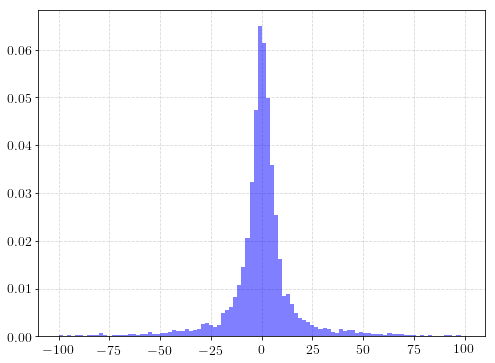

In [4]:
gamma = 5
gen = scipy.stats.cauchy(scale=gamma)
n_samples = 5000
samples = gen.rvs(n_samples, random_state=5)
print('min = {}, max = {}'.format(np.min(samples), np.max(samples)))
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, range=(-100, 100), normed=True, zorder=2, alpha=0.5, color='b');
plt.grid(alpha=0.5, linestyle='--', which='both')

Так как у распределения Коши не существует моментов $E(X^k)$, $k \in \mathbb{N}$, то будем оценивать значение $\gamma$ по значению функции распределения в точке $\alpha$.
\begin{gather*}
F(\alpha;\gamma) = \Int_{-\infty}^{\alpha} \frac{1}{\pi} \frac{\gamma}{x^2 + \gamma^2} dx = \frac{1}{\pi} \arctan\lp\frac{\alpha}{\gamma}\rp + \frac{1}{2}
\end{gather*}

Значение $F(\alpha;\gamma)$ мы можем оценить по выборке, взяв в методе моментов в качестве пробной функции индикатор
$g(x) = I[x \le \alpha]$:
\begin{gather*}
F(\alpha;\mmgamma) = \frac{1}{n}\Sum_{i=1}^n I[X_i \le \alpha] \triangleq \mean{I[\boldX_n \le \alpha]},\\
\frac{1}{\pi} \arctan\lp\frac{\alpha}{\mmgamma}\rp + \frac{1}{2} = \mean{I[\boldX_n \le \alpha]},\\
\mmgamma = \frac{\alpha}{\tan\lp \pi \lp \mean{I[\boldX_n \le \alpha]} - \frac{1}{2}\rp \rp}
\end{gather*}

Посмотрим, какие оценки $\mmgamma$ мы можем получить из нашей выборки $\boldX_n$ при различных порогах $\alpha$.

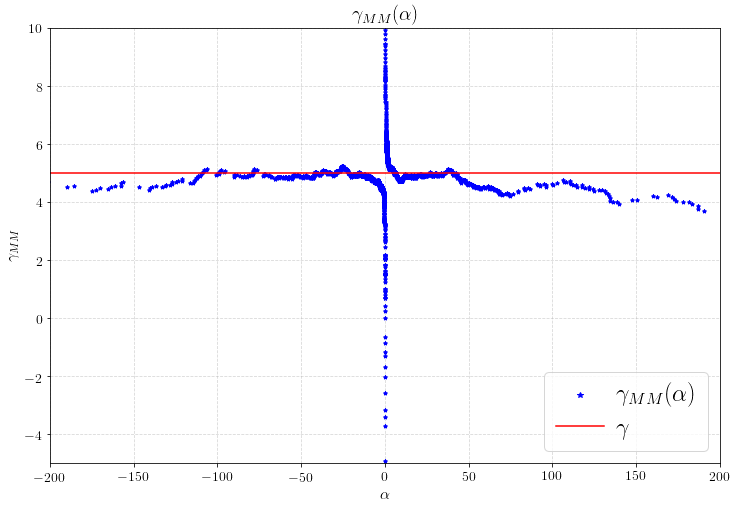

In [117]:
est_gammas = []
samples = np.sort(samples)
alpha_min = -200
alpha_max = 200
for n_sample, alpha in enumerate(samples):
    p = (n_sample + 1) / n_samples - 0.5
    if p != 0:
        est_gamma = alpha / np.tan(np.pi * p)
    else:
        est_gamma = 0
    est_gammas.append(est_gamma)
plt.figure(figsize=(12, 8))
plt.plot(samples, est_gammas, zorder=2, color='b', label=r'$\gamma_{MM}(\alpha)$', linestyle='none', marker='*',
        ms=4);
plt.plot([alpha_min, alpha_max], [gamma, gamma], color='r', zorder=2, label=r'$\gamma$');
plt.xlim(alpha_min, alpha_max); plt.ylim(-gamma, 2 * gamma);
plt.xlabel(r'$\alpha$'); plt.ylabel(r'$\gamma_{MM}$');
plt.title(r'$\gamma_{MM}(\alpha)$');
plt.legend(loc='lower right', fontsize=24);
plt.grid(alpha=0.5, linestyle='--', which='both');

Возникает законный вопрос о том, какое же и значений $\mmgamma(\alpha)$ взять. Для этого с помощью бутстрепа оценим доверительные интервалы для различных значений $\alpha$.

In [120]:
class Function:
    def __init__(self, alpha_range):
        self.alpha_range = np.sort(alpha_range)
    def __call__(self, samples):
        samples = np.sort(samples)
        n_samples = len(samples)
        n_thresholds = len(self.alpha_range)
        gammas = []; n_points = 0
        n_alpha = 0
        curr_alpha = self.alpha_range[n_alpha]
        for n_sample, sample in enumerate(samples):
            if curr_alpha < sample:
                p = (n_sample + 1) / n_samples - 0.5
                if p == 0: p = 1e-8
                while curr_alpha < sample:
                    gamma = curr_alpha / np.tan(np.pi * p)
                    gammas.append(gamma)
                    n_alpha += 1
                    if n_alpha < n_thresholds:
                        curr_alpha = self.alpha_range[n_alpha]
                    else:
                        assert len(gammas) == n_thresholds, '{} != {}'.format(len(gammas), n_thresholds)
                        return np.array(gammas)
        
        assert len(gammas) == n_thresholds, '{} != {}'.format(len(gammas), n_thresholds)
        return np.array(gammas)
    
gen = np.random.RandomState(1)    # Для воспроизводиости результатов
bootstrap_size = 5000             # Количество бутстрепных выборок
function = Function(alpha_range)  # Подсчет gamma сразу для всех порогов alpha
alpha_range = np.concatenate([np.linspace(-200, -1, 200), np.linspace(1, 200, 200)])  # 0 в расчет не берем, так как вырожденная точка


# Генерируем выборки бутстрепом и оцениваем значения gamma(alpha) по полученным выборкам
boot_gamma_estimates = []                   # Здесь будем хранить векторы значений gamma(alpha) для различных выборок
init_gamma_estimates = function(samples)    # Значения gamma(alpha) для исходной выборки
for i in tqdm(range(bootstrap_size)):
    boot_gamma_estimates.append(function(np.random.choice(samples, (n_samples,))))
boot_gamma_estimates = np.array(boot_gamma_estimates)
assert boot_gamma_estimates.shape == (bootstrap_size, len(alpha_range))

# Находим доверительные интервалы
z = abs(stats.norm().ppf(0.05 / 2))
func_stds = np.std(boot_gamma_estimates, axis=0)
upper = init_gamma_estimates + z * func_stds
lower = np.maximum(init_gamma_estimates - z * func_stds, 0)
width = upper - lower # Ширины доверительных интервалов

100%|██████████| 5000/5000 [00:08<00:00, 608.66it/s]


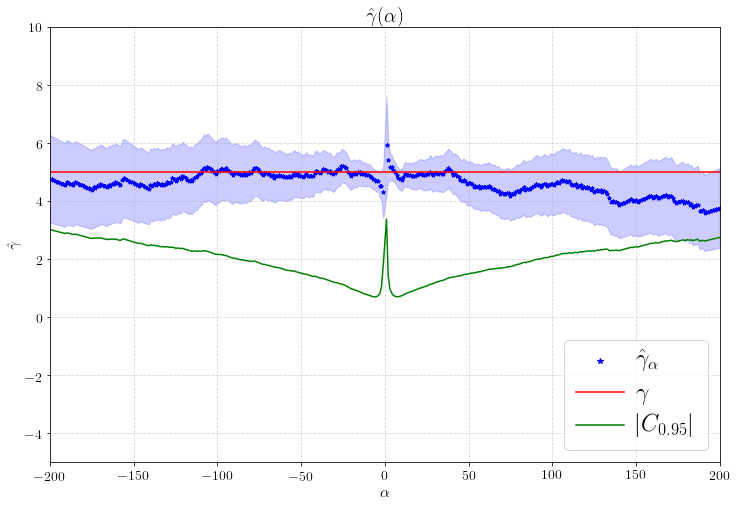

In [121]:
plt.figure(figsize=(12, 8))
plt.plot(alpha_range, init_gamma_estimates, zorder=2, color='b', 
         label=r'$\hat{\gamma}_{\alpha}$', linestyle='none', marker='*', ms=4);
plt.plot([alpha_range[0], alpha_range[-1]], [gamma, gamma], color='r', zorder=2, label=r'$\gamma$');
plt.fill_between(alpha_range, upper, lower, color='b', alpha=0.2)
plt.plot(alpha_range, width, color='g',label=r'$|C_{0.95}|$')
plt.xlim(alpha_range[0], alpha_range[-1]); plt.ylim(-gamma, 2 * gamma);
plt.xlabel(r'$\alpha$'); plt.ylabel(r'$\hat{\gamma}$');
plt.title(r'$\hat{\gamma}(\alpha)$');
plt.legend(loc='lower right', fontsize=24);
plt.grid(alpha=0.5, linestyle='--', which='both');

Теперь найдем значения оценки $\mmgamma$ в точках с минимальной шириной доверительного интервала.

In [122]:
K = 5
for index in np.argsort(width)[:K]:
    print('alpha = {}, gamma = {:.4f}, upper = {:.4f}, lower = {:.4f}, width = {:.4f}'.format(
        alpha_range[index], func_inits[index], upper[index], lower[index], width[index]))

alpha = -6.0, gamma = 4.7453, upper = 5.0973, lower = 4.3933, width = 0.7040
alpha = -7.0, gamma = 4.7636, upper = 5.1174, lower = 4.4099, width = 0.7075
alpha = 8.0, gamma = 4.7925, upper = 5.1464, lower = 4.4385, width = 0.7079
alpha = -5.0, gamma = 4.6894, upper = 5.0437, lower = 4.3351, width = 0.7086
alpha = 7.0, gamma = 4.8934, upper = 5.2496, lower = 4.5373, width = 0.7124


<a id='mle_exp'></a>
## Единственность точки максимума правдоподобия экспоненциального семейства распределений [[toc]](#toc)

Экспоненциальное семейство распределений, это семейство распределений с плотностями вида
\begin{gather*}
p(\boldx;\theta) = \frac{1}{h(\boldtheta)} g(\boldx) e^{\boldtheta^T \boldu(\boldx)},
\end{gather*}
где $\boldtheta \in \Theta \subseteq \RR^d$. Пусть $\boldX_n \sim F(x;\boldtheta)$, где $F(x;\boldtheta)$ --- функция распределения из экспоненциального семейства. Тогда
\begin{gather*}
l_n(\boldtheta|\boldX_n) = - n\log h(\boldtheta) + \Sum_{i = 1}^n g(X_i) + \Sum_{i = 1}^n \boldtheta^T \boldu(X_i) \rightarrow \max_{\boldtheta} \\
\end{gather*}
Вместо $l_n(\theta|\boldX_n)$ рассмотрим функцию $f(\boldtheta|\boldX_n)$:
\begin{gather*}
f(\boldtheta|\boldX_n) = \boldtheta^T \lp\frac{1}{n}\Sum_{i = 1}^n  \boldu(X_i)\rp - \log h(\theta).
\end{gather*}
Градиент имеет вид
\begin{gather*}
\frac{df(\boldtheta|\boldX_n)}{d\boldtheta} = \lp \frac{1}{n} \Sum_{i=1}^n u_1(X_i) - \frac{\partial \log h(\boldtheta)}{\partial \theta_1}, \dots, \frac{1}{n} \Sum_{i=1}^n u_d(X_i) - \frac{\partial \log h(\boldtheta)}{\partial \theta_d}\rp^T
\end{gather*}
Гессиан имеет вид
\begin{gather*}
H_{i,j}(f(\boldtheta)) = -\frac{\partial^2 \log h(\boldtheta)}{\partial \theta_i \partial \theta_j} =
-\frac{\partial}{\partial \theta_j} \lp\frac{1}{h(\boldtheta)}\frac{\partial h(\boldtheta)}{\partial \theta_i}\rp =
-\frac{1}{h(\boldtheta)}\frac{\partial^2 h(\boldtheta)}{\partial \theta_i \partial \theta_j} + \frac{1}{h^2(\boldtheta)} \frac{\partial h(\boldtheta)}{\partial \theta_i}\frac{\partial h(\boldtheta)}{\partial \theta_j}.
\end{gather*}

\begin{gather*}
\frac{\partial^2 \log h(\boldtheta)}{\partial \theta_i \partial \theta_j} = \Cov(u_i(X), u_j(X))
\end{gather*}

\begin{gather*}
h(\boldtheta) = \Int g(\boldx) e^{\boldtheta^T \boldu(\boldx)} d\boldx,\\
\frac{1}{h(\boldtheta)}\frac{\partial h(\boldtheta)}{\partial \theta_i} = \Int u_i(\boldx) g(\boldx) e^{\boldtheta^T \boldu(\boldx)} d\boldx = \Exp(u_i(X)), \\
\frac{1}{h^2(\boldtheta)}\frac{\partial^2 h(\boldtheta)}{\partial \theta_i \partial \theta_j} = \Int u_i(\boldx) u_j(\boldx) g(\boldx) e^{\boldtheta^T \boldu(\boldx)} d\boldx = \Exp(u_i(X) u_j(X)),\\
\Cov(u_i(X), u_j(X)) = \Exp(u_i(X) u_j(X)) - \Exp(u_i(X)) \Exp(u_j(X)) = \frac{1}{h(\boldtheta)} \frac{\partial^2 h(\boldtheta)}{\partial \theta_i \partial \theta_j}  - \frac{1}{h^2(\boldtheta)} \frac{\partial h(\boldtheta)}{\partial \theta_i} \frac{\partial h(\boldtheta)}{\partial \theta_j} = \frac{\partial^2 \log h(\boldtheta)}{\partial \theta_i \partial \theta_j}.
\end{gather*}

Так как матрица ковариаций положительно определена, то отсюда следует, что гессиан функции $f(\boldtheta;\boldX_n)$, а следователно и гессиан логарфима правдоподобия $l_n(\boldtheta)$, отрицательно определен. Значит функция $l_n(\boldtheta;\boldX_n)$ вогнута $\Rightarrow$ $l_n(\boldtheta;\boldX_n)$ имеет только один максимум $\boldtheta_{MLE}$.